In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Nama Target diganti dari dataset yang ada 
df.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_Time'}, inplace = True)

In [5]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Value pada Target yang sebelumnya 0 = On Time, 1 = Delayed diganti jadi 0 = Delayed, 1 = On Time
df['Reached_on_Time']= df['Reached_on_Time'].replace([0,1],[1,0])

In [7]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,0


In [ ]:
# Feature Warehouse_block diganti F jadi W karena tidak ada value F pada dataset saat ini
df['Warehouse_block'] = df['Warehouse_block'].replace(['F'], ['E'])

In [9]:
# jenis_kelamin & pendidikan label encoding
mapping_jenis_kelamin = {
    'F' : 0,
    'M' : 1
}

mapping_warehouse_block = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df['Gender'] = df['Gender'].map(mapping_jenis_kelamin)
df['Warehouse_block'] = df['Warehouse_block'].map(mapping_warehouse_block)
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)

In [10]:
# one hot encoding
for cat in ['Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [11]:
df = df.drop(columns= 'Mode_of_Shipment')

In [12]:
df.columns

Index(['ID', 'Warehouse_block', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached_on_Time',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship'],
      dtype='object')

In [ ]:
# Split Feature and Label
X = df.drop(columns=['ID','Reached_on_Time'])
y = df['Reached_on_Time'] # target / label

#Splitting the data into Train and Test
# Dataset di split Train 30% dan Test 70%
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       10999 non-null  int64
 1   Warehouse_block          10999 non-null  int64
 2   Customer_care_calls      10999 non-null  int64
 3   Customer_rating          10999 non-null  int64
 4   Cost_of_the_Product      10999 non-null  int64
 5   Prior_purchases          10999 non-null  int64
 6   Product_importance       10999 non-null  int64
 7   Gender                   10999 non-null  int64
 8   Discount_offered         10999 non-null  int64
 9   Weight_in_gms            10999 non-null  int64
 10  Reached_on_Time          10999 non-null  int64
 11  Mode_of_Shipment_Flight  10999 non-null  uint8
 12  Mode_of_Shipment_Road    10999 non-null  uint8
 13  Mode_of_Shipment_Ship    10999 non-null  uint8
dtypes: int64(11), uint8(3)
memory usage: 977.6 KB


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=100)
model.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [16]:
#Predict

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [17]:
model.predict_proba(X_test)

array([[0.74004169, 0.25995831],
       [0.40496932, 0.59503068],
       [0.35973412, 0.64026588],
       ...,
       [0.56862192, 0.43137808],
       [0.99281509, 0.00718491],
       [0.39866204, 0.60133796]])

In [18]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

Nilai Probabilitas 

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6252252376249774

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [21]:
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.54
Recall (Test Set): 0.58
F1-Score (Test Set): 0.56
AUC: 0.70


In [22]:
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Recall (Train Set): 0.60


In [23]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.6424210936485257
Test score:0.6339393939393939


In [24]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=100) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=100, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

C:\Users\ujihihi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ujihihi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ujihihi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

Accuracy (Test Set): 0.63
Precision (Test Set): 0.53
Recall (Test Set): 0.56
F1-Score (Test Set): 0.55
AUC: 0.71


C:\Users\ujihihi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.57
Recall (Test Set): 0.69
F1-Score (Test Set): 0.62
AUC: 0.73


In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train,y_train)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.56
Recall (Test Set): 0.57
F1-Score (Test Set): 0.56
AUC: 0.63


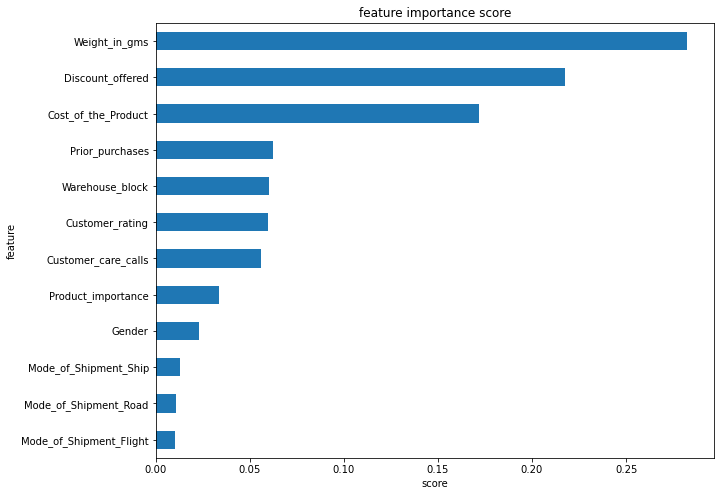

In [28]:
show_feature_importance(rf)

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=100)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=100, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.56
Recall (Test Set): 0.87
F1-Score (Test Set): 0.68
AUC: 0.73


In [30]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 2000
Best bootstrap: True
Best criterion: gini
Best max_depth: 10
Best min_samples_split: 8
Best min_samples_leaf: 1
Best max_features: auto
Best n_jobs: -1


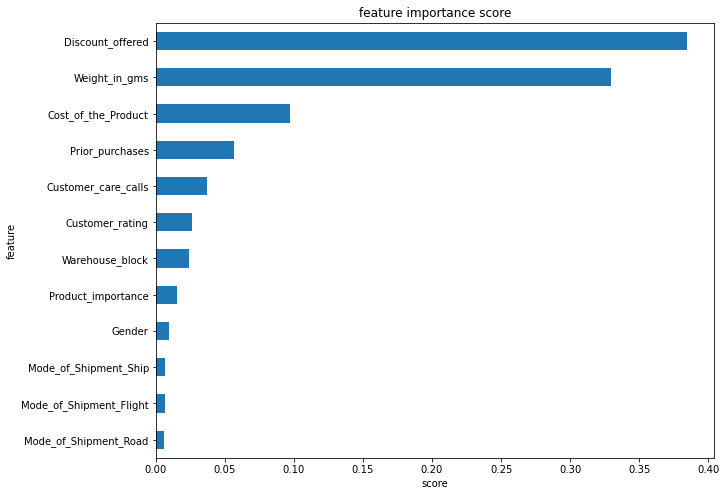

In [31]:
show_feature_importance(rf_tuned.best_estimator_)

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=100)
ab.fit(X_train,y_train)

eval_classification(ab, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.56
Recall (Test Set): 0.78
F1-Score (Test Set): 0.65
AUC: 0.74


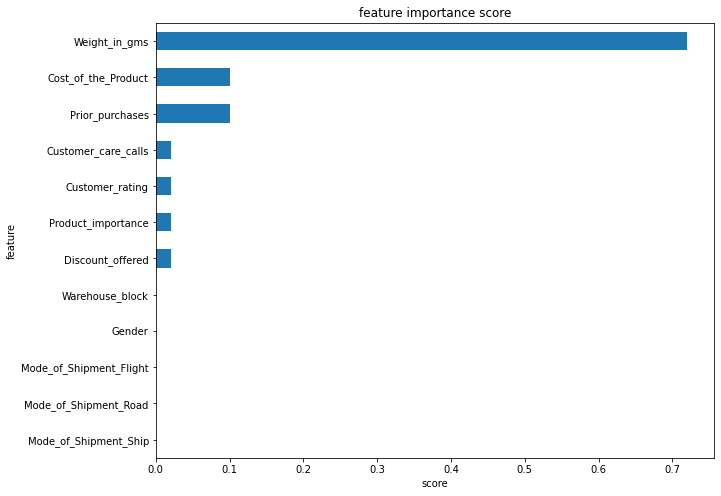

In [33]:
show_feature_importance(ab)

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=100)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=100, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.52
Recall (Test Set): 1.00
F1-Score (Test Set): 0.69
AUC: 0.69


In [35]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 135
Best learning_rate: 0.014929648241206031
Best algorithm: SAMME


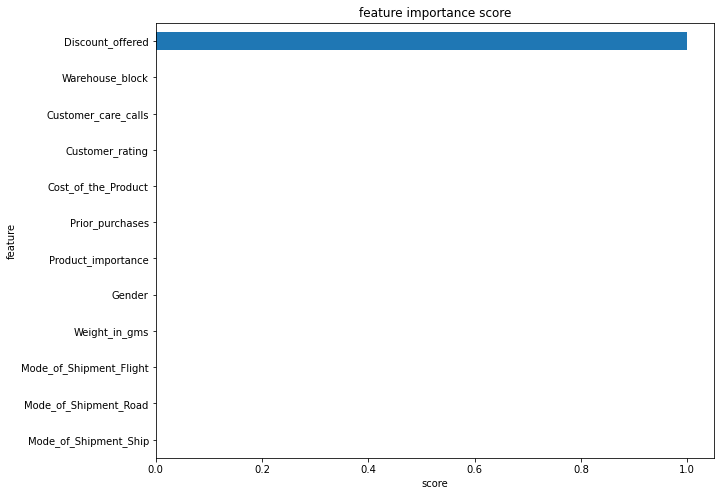

In [36]:
show_feature_importance(ab_tuned.best_estimator_)

In [37]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=100)
xg.fit(X_train, y_train)

eval_classification(xg, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.57
Recall (Test Set): 0.67
F1-Score (Test Set): 0.61
AUC: 0.74


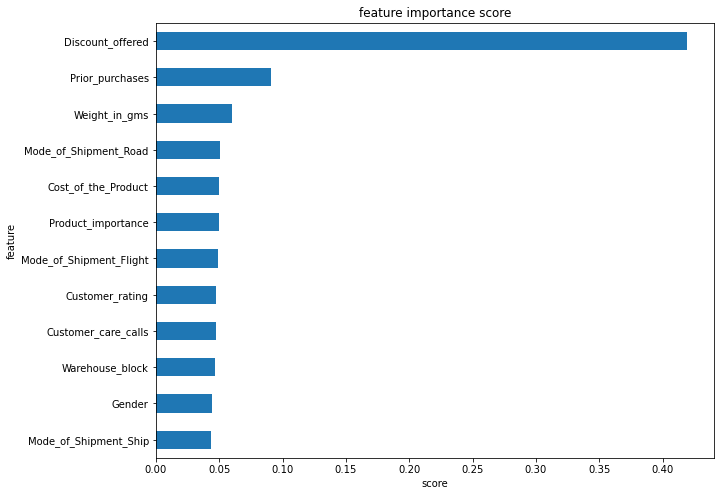

In [38]:
show_feature_importance(xg)

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=100)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=100, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.55
Recall (Test Set): 0.78
F1-Score (Test Set): 0.65
AUC: 0.73


In [40]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 80
Best min_child_weight: 18
Best gamma: 0.9
Best tree_method: approx
Best colsample_bytree: 0.0
Best eta: 0.6262626262626263
Best lambda: 0.8
Best alpha: 0.5


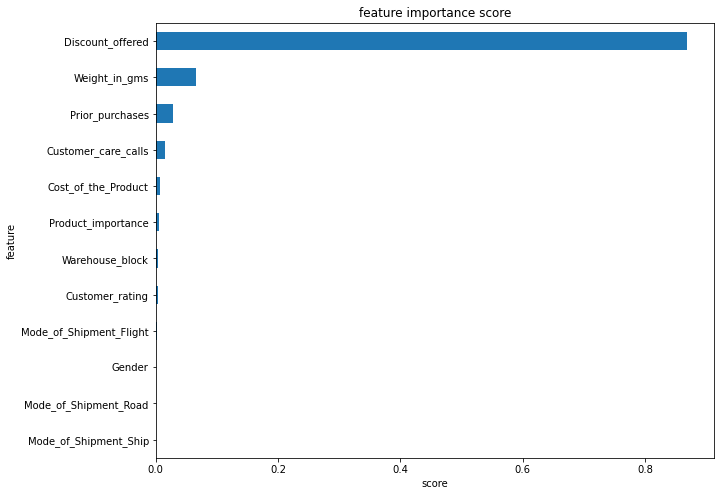

In [41]:
show_feature_importance(xg_tuned.best_estimator_)